In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/Outer Eastern.csv'
df = pd.read_csv(file_path)
print(df)

                Unnamed: 0         Unnamed: 1 Mar 2010 Unnamed: 83 Jun 2010  \
0  Outer Eastern Melbourne          Bayswater      443     $285.00      434   
1                      NaN            Boronia      587     $300.00      590   
2                      NaN   Croydon-Lilydale    1,866     $300.00    1,917   
3                      NaN     Ferntree Gully      445     $300.00      444   
4                      NaN           Ringwood    1,187     $300.00    1,187   
5                      NaN           Rowville      446     $350.00      436   
6                      NaN  Wantirna-Scoresby      689     $340.00      687   
7                      NaN       Yarra Ranges    1,175     $285.00    1,174   
8                      NaN        Group Total    6,838     $310.00    6,869   

  Unnamed: 85 Sep 2010 Unnamed: 87 Dec 2010 Unnamed: 89  ... Mar 2019  \
0     $290.00      452     $298.00      490     $310.00  ...      675   
1     $310.00      601     $315.00      617     $320.00  ...   

In [2]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

In [3]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

print(median_data)

              Suburb Median.1 Median.2 Median.3 Median.4 Median.5 Median.6  \
0          Bayswater  $285.00  $290.00  $298.00  $310.00  $310.00  $316.00   
1            Boronia  $300.00  $310.00  $315.00  $320.00  $320.00  $320.00   
2   Croydon-Lilydale  $300.00  $310.00  $315.00  $320.00  $330.00  $330.00   
3     Ferntree Gully  $300.00  $310.00  $320.00  $320.00  $320.00  $320.00   
4           Ringwood  $300.00  $310.00  $320.00  $320.00  $320.00  $321.00   
5           Rowville  $350.00  $360.00  $361.00  $370.00  $380.00  $380.00   
6  Wantirna-Scoresby  $340.00  $350.00  $350.00  $350.00  $360.00  $355.00   
7       Yarra Ranges  $285.00  $290.00  $295.00  $300.00  $310.00  $310.00   
8        Group Total  $310.00  $315.00  $320.00  $320.00  $330.00  $330.00   

  Median.7 Median.8 Median.9  ... Median.32 Median.33 Median.34 Median.35  \
0  $320.00  $320.00  $320.00  ...   $370.00   $375.00   $380.00   $380.00   
1  $320.00  $330.00  $330.00  ...   $370.00   $380.00   $380.00  

In [4]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

              Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  \
0          Bayswater     285.0     290.0     298.0     310.0     310.0   
1            Boronia     300.0     310.0     315.0     320.0     320.0   
2   Croydon-Lilydale     300.0     310.0     315.0     320.0     330.0   
3     Ferntree Gully     300.0     310.0     320.0     320.0     320.0   
4           Ringwood     300.0     310.0     320.0     320.0     320.0   
5           Rowville     350.0     360.0     361.0     370.0     380.0   
6  Wantirna-Scoresby     340.0     350.0     350.0     350.0     360.0   
7       Yarra Ranges     285.0     290.0     295.0     300.0     310.0   
8        Group Total     310.0     315.0     320.0     320.0     330.0   

   Median.6  Median.7  Median.8  Median.9  ...  Median.32  Median.33  \
0     316.0     320.0     320.0     320.0  ...      370.0      375.0   
1     320.0     320.0     330.0     330.0  ...      370.0      380.0   
2     330.0     330.0     340.0     340.0  

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_71812/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [5]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
             Suburb  Median.1  Median.2  Median.3  Median.4  Median.5  \
0         Bayswater       285       290       298       310       310   
1           Boronia       300       310       315       320       320   
2  Croydon-Lilydale       300       310       315       320       330   
3    Ferntree Gully       300       310       320       320       320   
4          Ringwood       300       310       320       320       320   

   Median.6  Median.7  Median.8  Median.9  ...  Median.32  Median.33  \
0       316       320       320       320  ...        370        375   
1       320       320       330       330  ...        370        380   
2       330       330       340       340  ...        390        395   
3       320       330       330       325  ...        395        395   
4       321       330       330       335  ...        385        385   

   Median.34  Median.35  Median.36  Median.37  Median.38  Median.39  \
0        380   

Growth trend for Bayswater:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  1.754386  2.758621  4.026846       0.0  1.935484  1.265823   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0        0.0  ...   1.351351   1.333333        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0        0.0   1.315789   1.298701        0.0        0.0  12.820513   

   Average Growth Rate (%)  
0                 1.113295  

[1 rows x 42 columns]


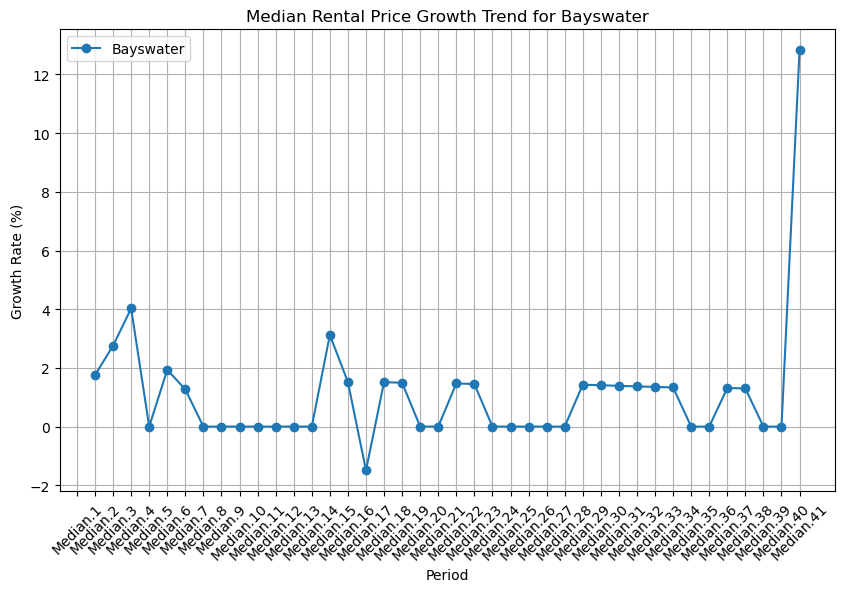

Growth trend for Boronia:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>  3.333333  1.612903  1.587302       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1     3.125       0.0        0.0  ...   2.702703        0.0   1.315789   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1   1.298701        0.0        0.0        0.0        0.0  15.384615   

   Average Growth Rate (%)  
1                 1.049751  

[1 rows x 42 columns]


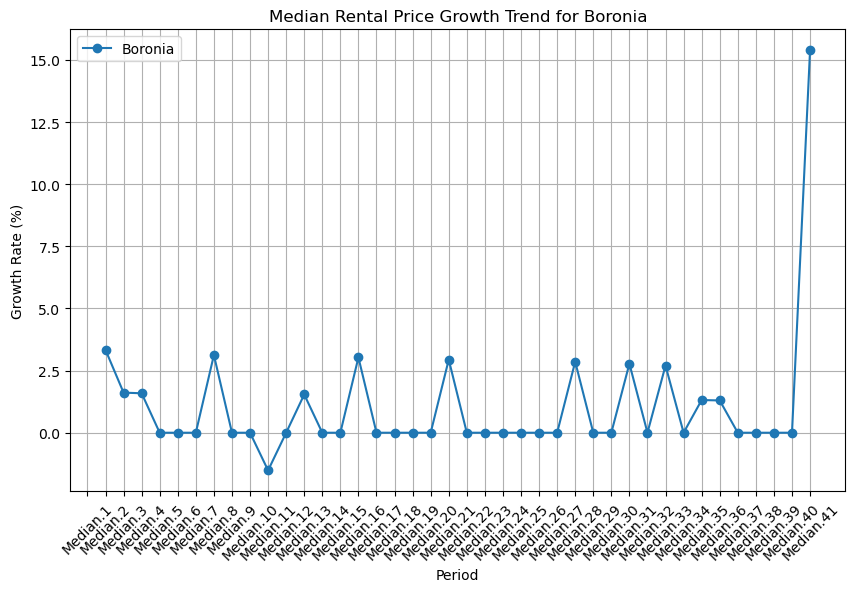

Growth trend for Croydon-Lilydale:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>  3.333333  1.612903  1.587302     3.125       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2  3.030303       0.0        0.0  ...   1.282051   1.265823        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2        0.0        0.0        2.5        0.0        0.0  14.634146   

   Average Growth Rate (%)  
2                  1.15482  

[1 rows x 42 columns]


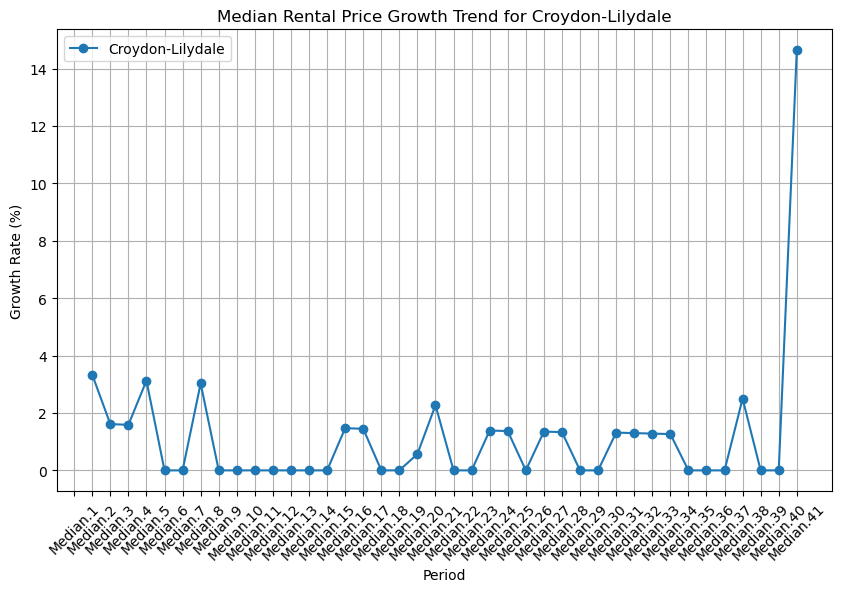

Growth trend for Ferntree Gully:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>  3.333333  3.225806       0.0       0.0       0.0     3.125   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3       0.0 -1.515152  -1.538462  ...        0.0   1.265823        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3        0.0        0.0        0.0        0.0        2.5  12.195122   

   Average Growth Rate (%)  
3                 1.096781  

[1 rows x 42 columns]


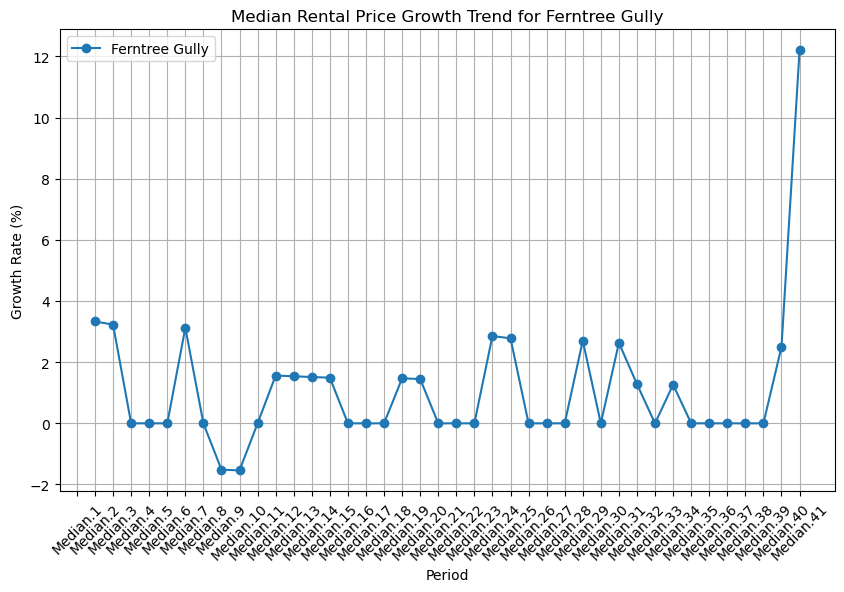

Growth trend for Ringwood:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>  3.333333  3.225806       0.0       0.0    0.3125  2.803738   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4       0.0  1.515152        0.0  ...        0.0   1.298701   1.282051   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4   1.265823        0.0        0.0        0.0        0.0       12.5   

   Average Growth Rate (%)  
4                 1.040163  

[1 rows x 42 columns]


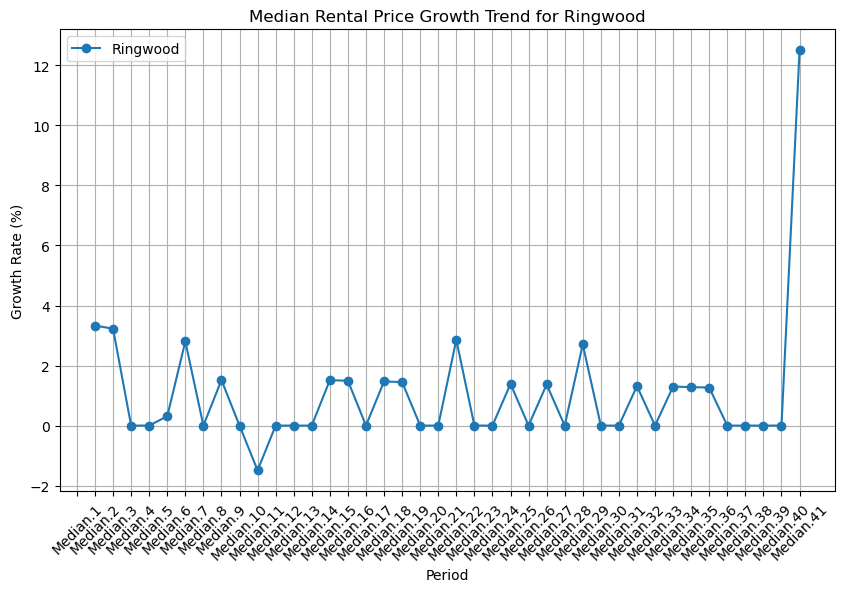

Growth trend for Rowville:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>  2.857143  0.277778  2.493075  2.702703       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5       0.0  2.631579        0.0  ...  -0.226757   1.136364   1.123596   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5        0.0        0.0        0.0        0.0        0.0  13.333333   

   Average Growth Rate (%)  
5                 0.969096  

[1 rows x 42 columns]


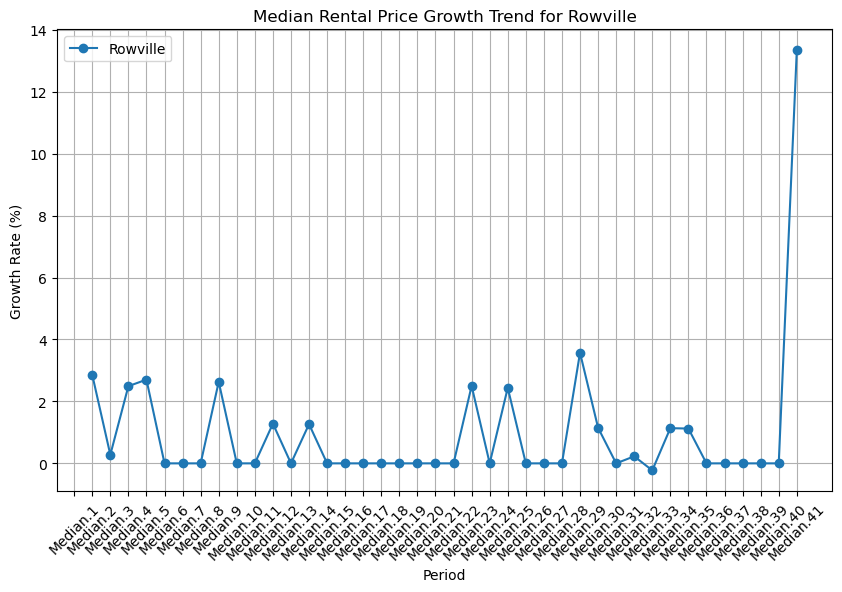

Growth trend for Wantirna-Scoresby:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
6      <NA>  2.941176       0.0       0.0  2.857143 -1.388889  1.408451   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
6       0.0  1.388889        0.0  ...        0.0        0.0   2.325581   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
6        0.0   2.045455  -2.004454        0.0        0.0  11.363636   

   Average Growth Rate (%)  
6                 0.937165  

[1 rows x 42 columns]


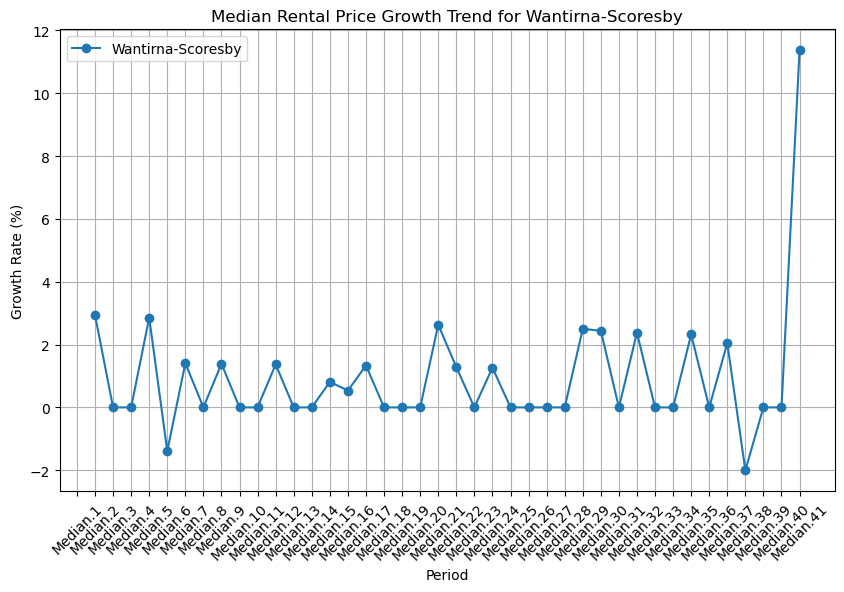

Growth trend for Yarra Ranges:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
7      <NA>  1.754386  1.724138  1.694915  3.333333       0.0  3.225806   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
7       0.0       0.0        0.0  ...   1.333333        0.0   1.315789   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
7   1.298701        0.0   1.282051   1.265823        0.0       19.5   

   Average Growth Rate (%)  
7                  1.34479  

[1 rows x 42 columns]


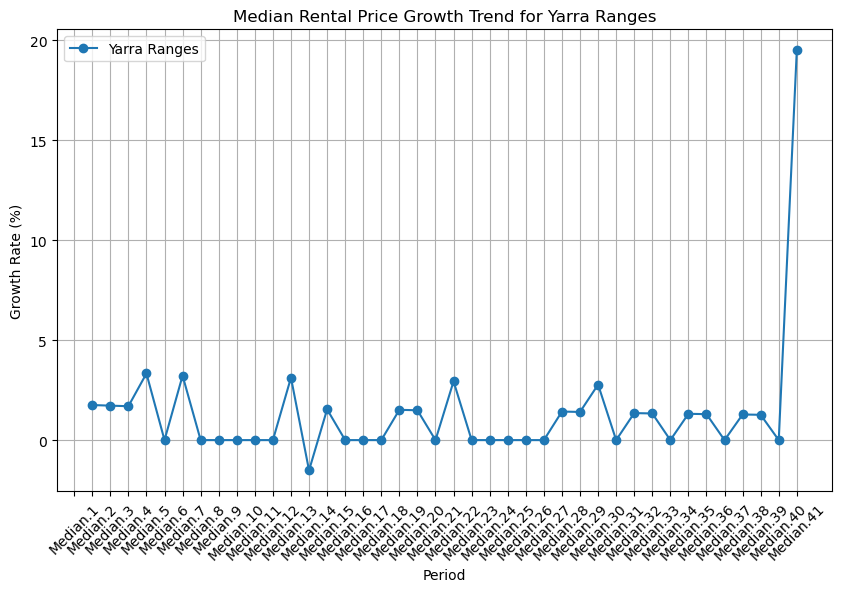

Growth trend for Group Total:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
8      <NA>  1.612903  1.587302       0.0     3.125       0.0  1.515152   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
8  1.492537       0.0        0.0  ...   1.282051   1.265823        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
8        0.0        0.0        0.0       1.75   0.737101  12.195122   

   Average Growth Rate (%)  
8                 1.010908  

[1 rows x 42 columns]


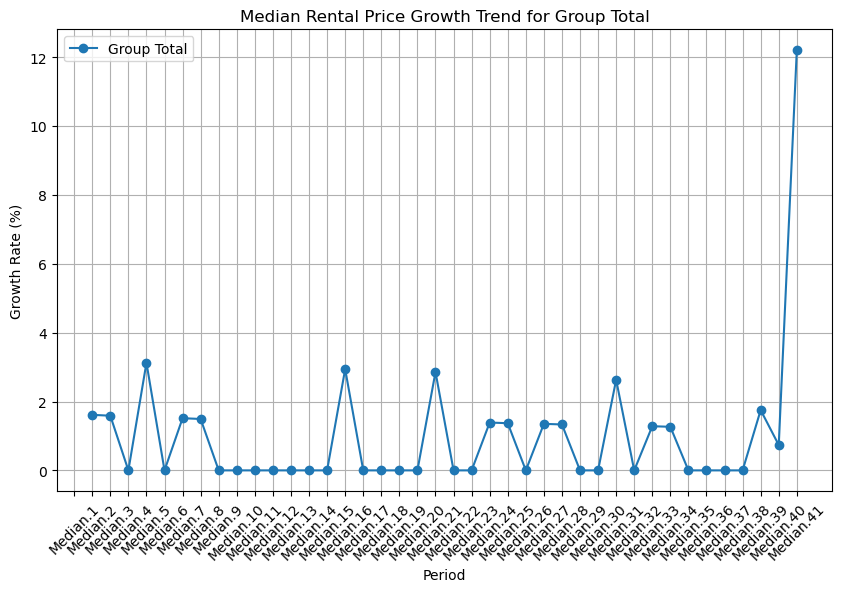

All suburbs growth trends:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  1.754386  2.758621  4.026846       0.0  1.935484  1.265823   
1      <NA>  3.333333  1.612903  1.587302       0.0       0.0       0.0   
2      <NA>  3.333333  1.612903  1.587302     3.125       0.0       0.0   
3      <NA>  3.333333  3.225806       0.0       0.0       0.0     3.125   
4      <NA>  3.333333  3.225806       0.0       0.0    0.3125  2.803738   
5      <NA>  2.857143  0.277778  2.493075  2.702703       0.0       0.0   
6      <NA>  2.941176       0.0       0.0  2.857143 -1.388889  1.408451   
7      <NA>  1.754386  1.724138  1.694915  3.333333       0.0  3.225806   
8      <NA>  1.612903  1.587302       0.0     3.125       0.0  1.515152   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0        0.0  ...   1.351351   1.333333        0.0   
1     3.125       0.0        0.0  ...   2.702703        0.0   1.315789   


In [6]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [7]:
print(growth_trends["Average Growth Rate (%)"])

0    1.113295
1    1.049751
2     1.15482
3    1.096781
4    1.040163
5    0.969096
6    0.937165
7     1.34479
8    1.010908
Name: Average Growth Rate (%), dtype: Float64


In [8]:
print(df["Suburb"])

0            Bayswater
1              Boronia
2     Croydon-Lilydale
3       Ferntree Gully
4             Ringwood
5             Rowville
6    Wantirna-Scoresby
7         Yarra Ranges
8          Group Total
Name: Suburb, dtype: object
